# Breast Cancer  detection
### John Cancer Hospital - HealthCare

### Business challenge/requirement
#### John Cancer Hospital (JCH) is a leading cancer hospital in USA. It specializes in preventingbreast cancer.
#### Over the period of the last few years, JCH has collected breast cancer data from patients who came for screening/treatment.
#### However,this data has almost 30 attributes and is difficult to run and interpret the result. ML expert has to reduce the no. of attributes (Dimensionality Reduction) so that results are meaningful and accurate.
Determine if cancer diagnosis is malignant of benign <br/>
Diagnosis (M = malignant, B = benign)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv('breast-cancer-data.csv ')

In [3]:
# analyse the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
# data wrangling: Map 'diagnosis' column: M=>1  B=>0
df.diagnosis = pd.Categorical(df.diagnosis)
df['diagnosis'] = df.diagnosis.cat.codes

In [6]:
# check
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
# get X and y
X = df.loc[:,'radius_mean':]
y = df.diagnosis

#### Finding the best number of components:

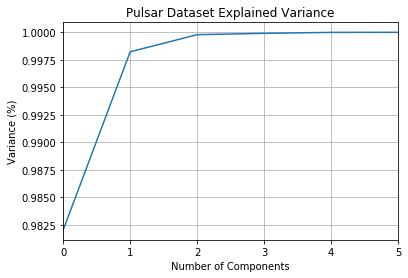

In [8]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)

#ax = plt.subplots()
#ax.set_xticks(0, 1,10)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.xlim([0, 5])
plt.grid()
plt.show()

In [9]:
# Dimensionality Reduction using PCA
    # instantiate
pca = PCA(n_components=2)

    # fit
pca.fit(X)
x_Trnsf = pca.transform(X)

    # total explained variance ratio
pca.explained_variance_ratio_.sum()

0.9982211613741723

2 Components explains more than 99.8% of variance (information)

In [10]:
# make dataframe
x_Trnsf_df = pd.DataFrame(x_Trnsf)
x_Trnsf_df.shape

(569, 2)

In [11]:
# train/test split
x_train,x_test,y_train,y_test = train_test_split(x_Trnsf_df,y,test_size=0.2,random_state=42)

In [12]:
# fit
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# predict
pred_y = logistic.predict(x_test)

In [14]:
# measure accuracy
metrics.accuracy_score(pred_y, y_test)

0.9649122807017544